In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [4]:
df = pd.read_csv('/content/Titanic-Dataset.csv')



In [5]:
# Step 1: Import dataset and explore basic info
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
titanic_df = pd.read_csv('Titanic-Dataset.csv')

# Explore basic info
print("Basic Info:")
print(titanic_df.info())
print("\nSummary:")
print(titanic_df.describe())
print("\nNull Values:")
print(titanic_df.isnull().sum())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std    

In [6]:
# Step 2: Handle missing values

# Fill missing 'Age' with median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most frequent value (mode)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' because too many missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

# Check again
print("\nNull Values After Handling:")
print(titanic_df.isnull().sum())



Null Values After Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-6-345499033.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
/tmp/ipython-input-6-345499033.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [7]:
# Step 3: Convert categorical features using Label Encoding

# Convert 'Sex' and 'Embarked' to numeric
le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])


In [8]:
# Step 4: Normalize/Standardize numerical features

# Select numerical columns to scale
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Standardization
scaler = StandardScaler()
titanic_df[numerical_cols] = scaler.fit_transform(titanic_df[numerical_cols])

print("\nFirst 5 rows after scaling:")
print(titanic_df.head())



First 5 rows after scaling:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age     SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861  0.432793   
2                             Heikkinen, Miss. Laina    0 -0.258337 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312  0.432793   
4                           Allen, Mr. William Henry    1  0.433312 -0.474545   

      Parch            Ticket      Fare  Embarked  
0 -0.473674         A/5 21171 -0.502445         2  
1 -0.473674          PC 17599  0.786845         0  
2 -0.473674  STON/O2. 3101282 -0.488854         2  
3 -0.473674            113803  0.420730         2  
4 -0.47

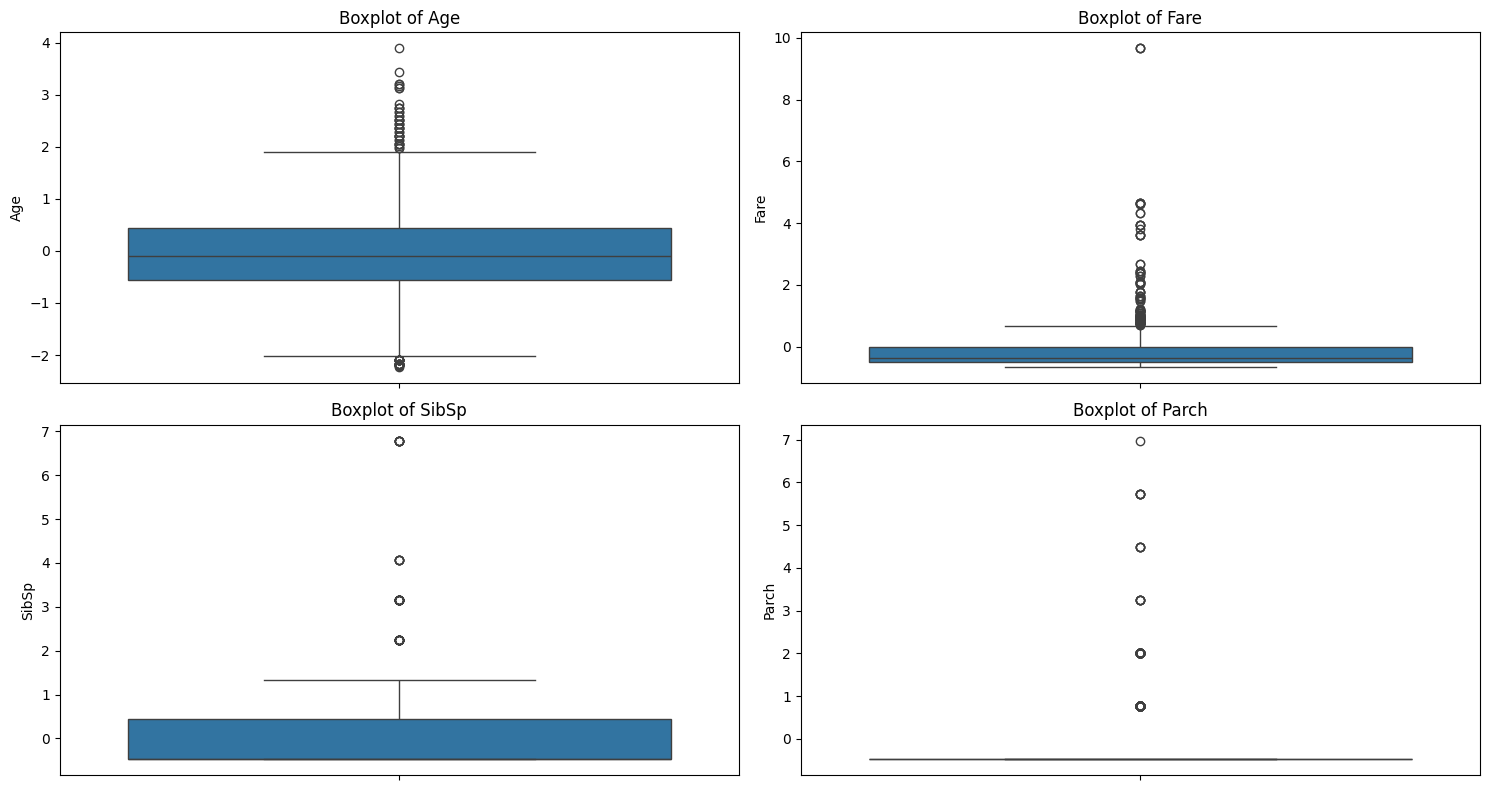

In [9]:
# Step 5: Visualize outliers using boxplots

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=titanic_df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


In [10]:
# Outlier Removal using IQR method

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numerical feature
for col in numerical_cols:
    titanic_df = remove_outliers(titanic_df, col)

print("\nShape after outlier removal:", titanic_df.shape)



Shape after outlier removal: (577, 11)


 1.Generate summary statistics (mean, median, std, etc.).
 2.Create histograms and boxplots for numeric features.
 3.Use pairplot/correlation matrix for feature relationships.
 4.Identify patterns, trends, or anomalies in the data.
 5.Make basic feature-level inferences from visuals

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Step 1: Generate Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))  # Include both numeric and categorical columns

# Calculate additional median
print("\nMedian Values:")
print(df.median(numeric_only=True))



Summary Statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   71

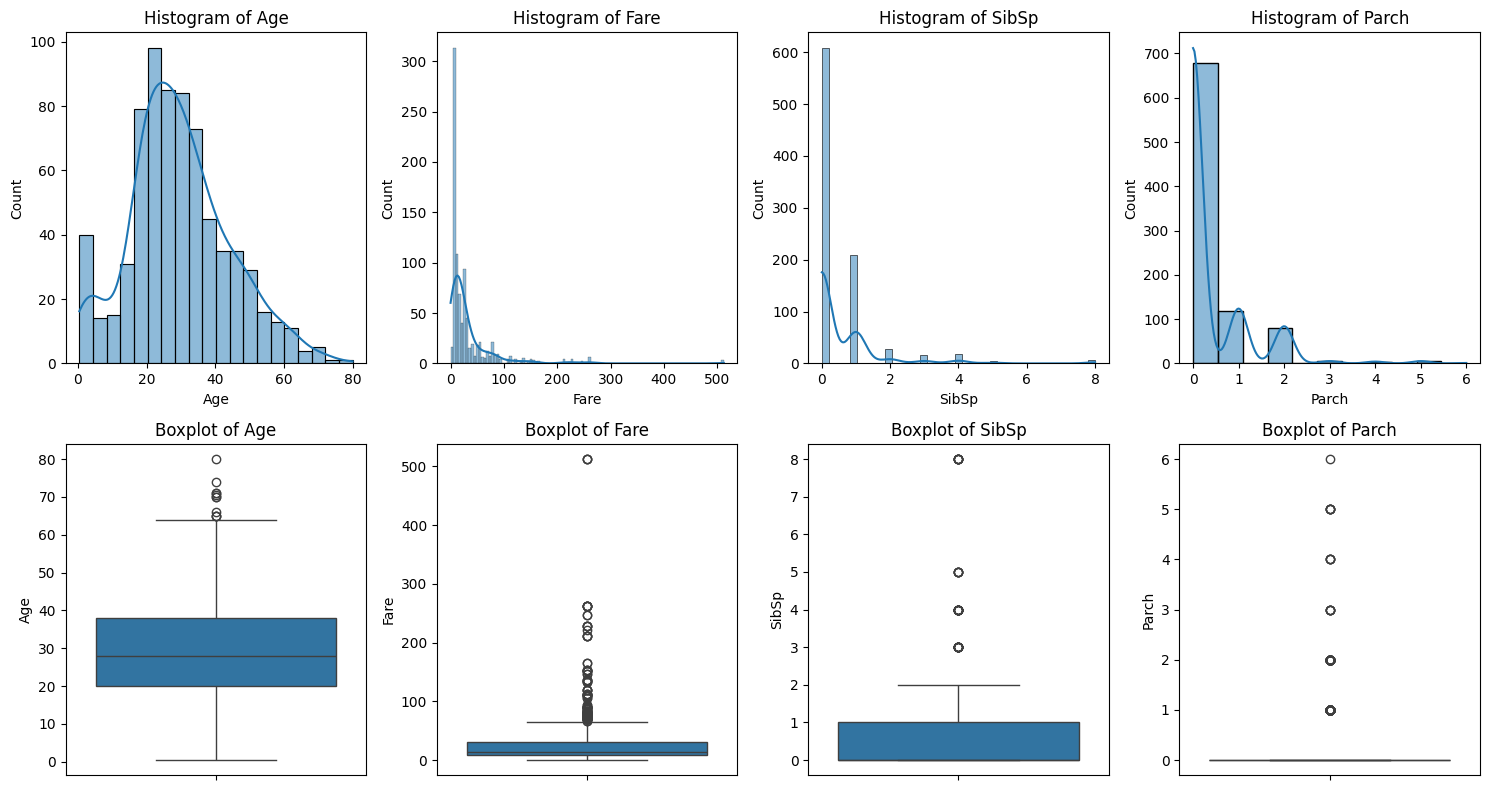

In [13]:
# Step 2: Create Histograms and Boxplots for Numeric Features
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(15, 8))

# Histograms
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Histogram of {feature}')

# Boxplots
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 4, i+5)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


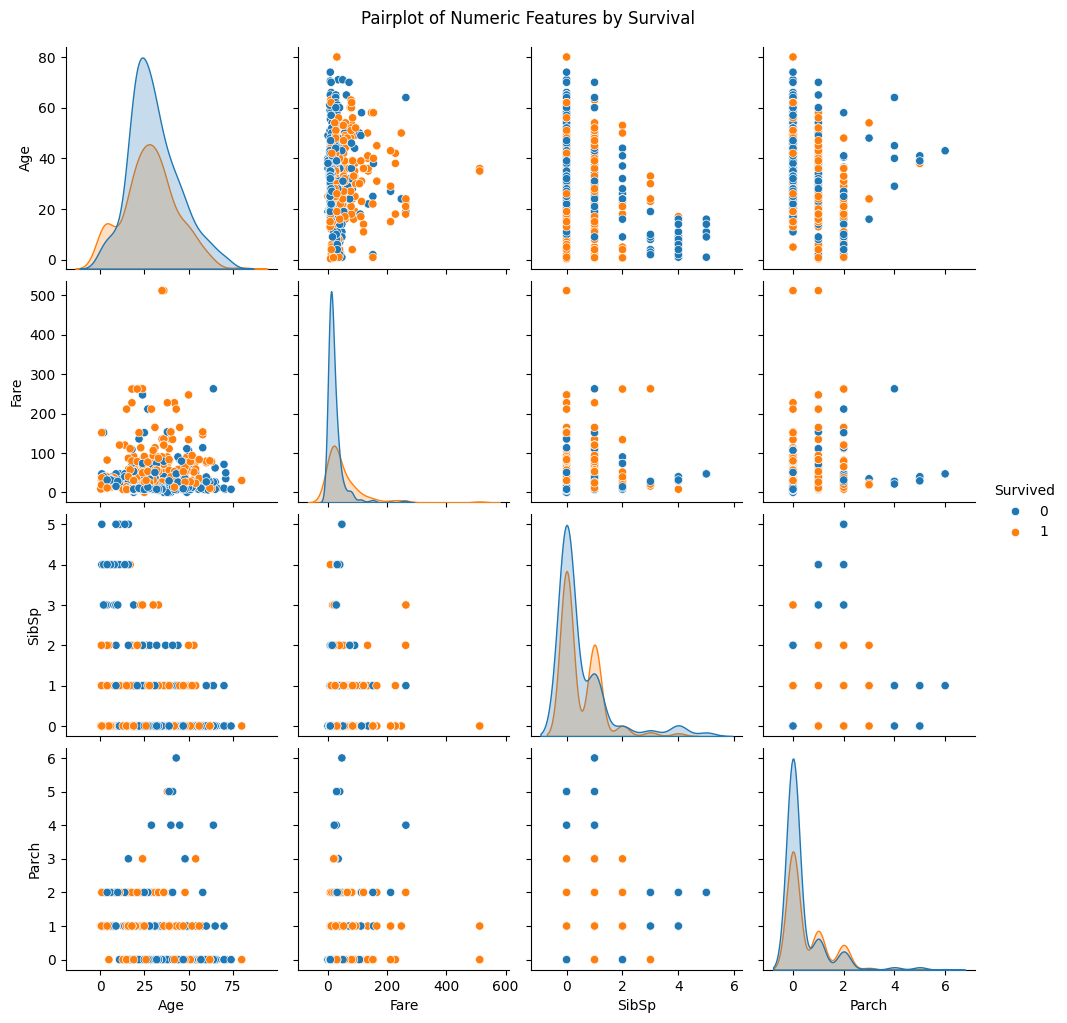

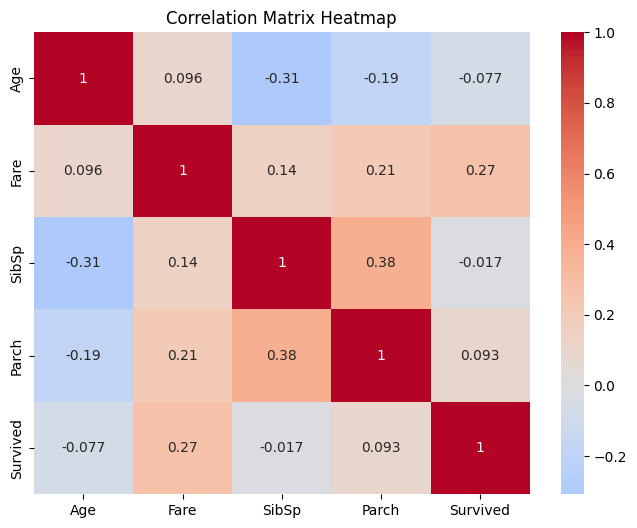

In [14]:
# Step 3: Pairplot and Correlation Matrix for Feature Relationships
# Remove missing values for plotting
clean_df = df[numeric_features + ['Survived']].dropna()

# Pairplot
sns.pairplot(clean_df, hue='Survived', diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features by Survival', y=1.02)
plt.show()

# Correlation Matrix
plt.figure(figsize=(8, 6))
corr_matrix = clean_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [15]:
# Step 4: Identify Patterns, Trends, or Anomalies
print("\nObservations:")
print("- Age shows possible outliers in younger and older passengers.")
print("- Fare shows some very high outliers (possible VIP or first-class passengers).")
print("- Passengers with higher SibSp (siblings/spouses) or Parch (parents/children) counts are less frequent but may show trends in survival.")
print("- Strong positive correlation between SibSp and Parch (families traveling together).")
print("- Survived is slightly positively correlated with Fare and slightly negatively with Age.")




Observations:
- Age shows possible outliers in younger and older passengers.
- Fare shows some very high outliers (possible VIP or first-class passengers).
- Passengers with higher SibSp (siblings/spouses) or Parch (parents/children) counts are less frequent but may show trends in survival.
- Strong positive correlation between SibSp and Parch (families traveling together).
- Survived is slightly positively correlated with Fare and slightly negatively with Age.


In [16]:
# Step 5: Basic Feature-Level Inferences
print("\nInferences from Visuals:")
print("- Younger passengers and those who paid higher fares had a higher chance of survival.")
print("- Passengers with very high Fare values are rare and mostly survived (likely first-class).")
print("- Outliers in Age and Fare might indicate special cases (VIPs, children, etc.).")
print("- Survival seems to have weak correlation with SibSp and Parch individually, but combined family size might be important.")



Inferences from Visuals:
- Younger passengers and those who paid higher fares had a higher chance of survival.
- Passengers with very high Fare values are rare and mostly survived (likely first-class).
- Outliers in Age and Fare might indicate special cases (VIPs, children, etc.).
- Survival seems to have weak correlation with SibSp and Parch individually, but combined family size might be important.
